In [1]:
# pandas, numpy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series,DataFrame

# matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# to make the plots visible in notebook
%matplotlib inline 

In [2]:
data = pd.read_csv('C:/Users/Doc/Projects/Rate prediction/train.csv')

In [3]:
train = pd.read_csv('C:/Users/Doc/Projects/Rate prediction/train.csv')

In [4]:
cda = pd.read_csv('C:/Users/Doc/Projects/Rate prediction/train.csv')


In [5]:
data.shape

(316200, 6)

In [66]:
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [6]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [7]:
#removing outliers
data = data[data['age']<100]

In [8]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [9]:
# Conversion stats
data['converted'].sum()

10198L

In [10]:
(10198/316200.0) * 100

3.2251739405439594

In [11]:
#Grouping data to see any corelation
converted = data.groupby('country')['converted'].sum()
converted


country
China       102
Germany     815
UK         2549
US         6732
Name: converted, dtype: int64

In [12]:
china = data[data['country']== 'China']

In [13]:
UK = data[data['country']== 'UK']

In [14]:
US =data[data['country']== 'US']

In [15]:
Germany = data[data['country']== 'Germany']

In [16]:
china['converted'].count()

76602

In [17]:
china['converted'].sum()

102L

In [18]:
con_per_china = (102 / 76602.0 )* 100
con_per_china

0.13315579227696406

In [19]:
#Conversion ration per country
def con_per(df):
    covert = df.converted.sum()
    total = df.converted.count()
    ratio = (covert * 100.00 / total) 
    return ratio
    
    
    

In [20]:
china.converted.sum()

102L

In [21]:
con_per(china)

0.13315579227696406

In [22]:
con_per(UK)

5.26120250159962

In [23]:
con_per(data)

3.2251943402551566

In [24]:
con_per(US)

3.7800687285223367

In [25]:
con_per(Germany)

6.242818843355036

In [26]:
china.head()

,country,age,new_user,source,total_pages_visited,converted
3,China,39,1,Seo,5,0
6,China,27,1,Seo,4,0
12,China,31,0,Seo,6,0
14,China,27,1,Ads,3,0
17,China,36,0,Direct,9,0


In [27]:
#Let try to see with new_users affecting the conversion
new = data.groupby('country')['new_user'].sum()
new2 = data.groupby('country')['new_user'].count()

In [28]:
data.groupby('country')['converted'].sum()

country
China       102
Germany     815
UK         2549
US         6732
Name: converted, dtype: int64

In [29]:
def con_pe(df):
    covert = df.new_user.sum()
    total = df.new_user.count()
    ratio = (covert * 100.00 / total) 
    return ratio

In [30]:
con_pe(china)con_per(china)

SyntaxError: invalid syntax (<ipython-input-30-45090900ea91>, line 1)

In [31]:
con_per(US)

3.7800687285223367

In [32]:
con_per(Germany)

6.242818843355036

In [33]:
con_per(UK)

5.26120250159962

In [34]:
data.groupby('source')['source'].count()


source
Ads        88739
Direct     72420
Seo       155039
Name: source, dtype: int64

In [35]:
ch = china.groupby('source')['source'].count().to_frame()

In [36]:
uk1 = UK.groupby('source')['source'].count().to_frame()

In [37]:
us1 = US.groupby('source')['source'].count().to_frame()

In [38]:
ger = Germany.groupby('source')['source'].count().to_frame()

In [39]:
ch

,source
source,
Ads,21561
Direct,17463
Seo,37578


In [40]:
ch.source * 100 / 76602.0

source
Ads       28.146785
Direct    22.797055
Seo       49.056160
Name: source, dtype: float64

In [41]:
ch.source.sum()

76602L

In [42]:
def con_pa(df):
    ct = df.source.sum()
    rat = (df.source * 100) / ct
    
    return rat

In [43]:
con_pa(ch)

source
Ads       28.146785
Direct    22.797055
Seo       49.056160
Name: source, dtype: float64

In [44]:
con_pa(uk1)

source
Ads       27.899441
Direct    22.974674
Seo       49.125885
Name: source, dtype: float64

In [45]:
con_pa(us1)

source
Ads       28.019788
Direct    23.000472
Seo       48.979741
Name: source, dtype: float64

In [46]:
con_pa(ger)

source
Ads       28.801226
Direct    21.937955
Seo       49.260820
Name: source, dtype: float64

In [47]:
pv = data.groupby('country')['total_pages_visited'].sum()
pv


country
China      348809
Germany     67755
UK         246221
US         878022
Name: total_pages_visited, dtype: int64

In [48]:
china.head(1)

,country,age,new_user,source,total_pages_visited,converted
3,China,39,1,Seo,5,0


In [49]:
china.total_pages_visited.sum()

348809L

In [50]:
china.converted.sum()

102L

In [51]:
ratio = 102 * 100.0/348809.0 

In [52]:
ratio


0.029242364732561373

In [53]:
def co_pe(df):
    no_of_cos = df.total_pages_visited.sum()
    converted = df.converted.sum()
    ratio = (converted * 100.00 / no_of_cos) 
    return ratio

In [54]:
co_pe(china)

0.029242364732561373

In [55]:
list = ['china', 'US', 'UK', 'Germany']

In [56]:
co_pe(US)

0.7667233850632444

In [57]:
co_pe(Germany)

1.2028632573241826

In [58]:
co_pe(UK)

1.0352488211809716

In [59]:
train.head(1)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0


In [60]:
#The conversion ratio of China is the lowest at 0.029 compared to others resulting in the low conversion ratio

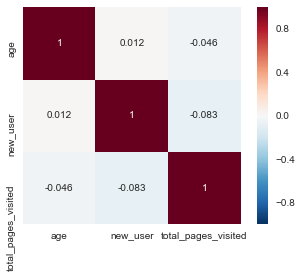

In [68]:
sns.heatmap(data.drop('converted',axis=1).corr(), square=True, annot=True, center=0)

In [69]:
y = data.corr(method='pearson', min_periods=1)
y

,age,new_user,total_pages_visited,converted
age,1.000000,0.012445,-0.046093,-0.089199
new_user,0.012445,1.000000,-0.082522,-0.152338
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975
converted,-0.089199,-0.152338,0.528975,1.000000


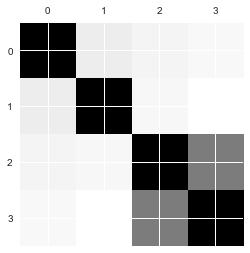

In [71]:
plt.matshow(data.corr())

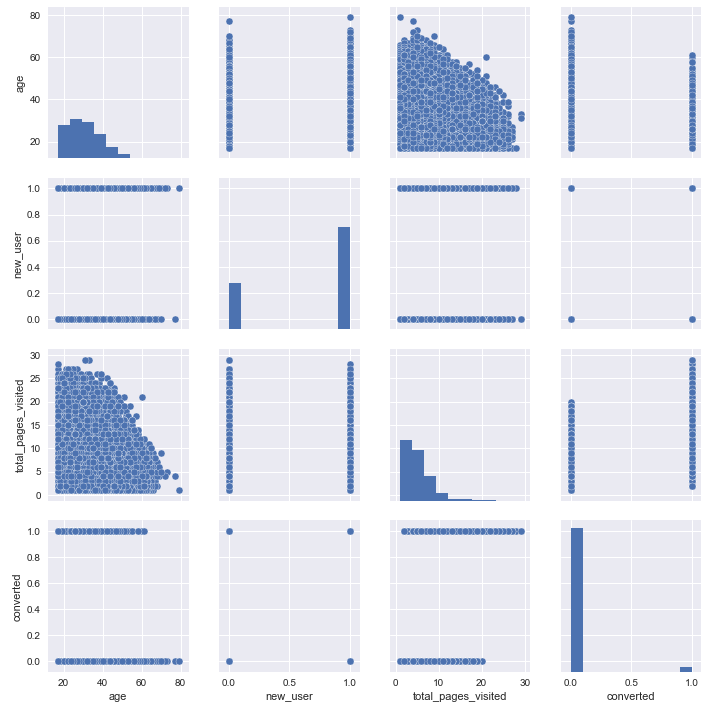

In [72]:
sns.pairplot(data)

In [79]:
for dat in data:
    dat['country'] = data['country'].map({ 'UK':0, 'US':1, 'China':2, 'Germany':3 }).astype(int)

TypeError: 'str' object does not support item assignment

In [75]:
data['country'].unique()

array(['UK', 'US', 'China', 'Germany'], dtype=object)

In [78]:
data.country = pd.Categorical(data.country)

In [ ]:
#prediction

# Ml
# Importing modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
cols = ('country', 'source')
# process columns, apply LabelEncoder to categorical features
for k in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[k].values)) 
    data[k] = lbl.transform(list(data[k].values))

# shape        
print('Shape all_data: {}'.format(data.shape))

In [207]:
X = data.drop('converted',axis=1)
y = data.converted

# Split into train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Shape of you
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

ValueError: labels ['converted'] not contained in axis

In [176]:
# RF
rtree_clf = RandomForestClassifier(n_estimators=100)
rtree_clf.fit(X_train, y_train)
y_pred = rtree_clf.predict(X_test)
print ('Score: %.2f%%' % (round(rtree_clf.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))

ValueError: could not convert string to float: US

In [ ]:
w